# Network Dataset
## Group 1

## Meta dataset
- This the actual dataset of the products.

In [ ]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# Initialize lists to store product information
products_list = []
reviews_list = []

with open('/content/drive/MyDrive/2024-I/Network Science for Data Analytics/Network Science for Data Analytics/datasets/amazon-meta.txt', 'r') as file:
    product = {}
    reviews = []
    for line in file:
        # line = line.strip()

        if line.strip() == 'Id:0':
          break

        if line.startswith('Id'):
            if product:
                products_list.append(product)
                reviews_list.extend(reviews)
                reviews = []
            product = {'Id': line.strip().split()[1]}
        elif line.startswith('ASIN'):
            product['ASIN'] = line.strip().split()[1]
        elif line.strip().startswith('title'):
            product['title'] = line.strip().split(':', 1)[1]
        elif line.strip().startswith('group'):
            product['group'] = line.strip().split(' ', 1)[1]
        elif line.strip().startswith('salesrank'):
            product['salesrank'] = int(line.strip().split()[1])
        elif line.strip().startswith('categories'):
            product['categories'] = int(line.strip().split()[1])
        elif line.strip().startswith('reviews'):
            product['reviews_total'] = int(line.strip().split()[2])
            product['reviews_downloaded'] = int(line.strip().split()[4])
            product['reviews_avg_rating'] = float(line.strip().split()[7])
        elif line.strip().startswith('cutomer'):  # Assuming a typo here, should be 'customer'
            review_details = line.strip().split()
            reviews.append({
                'product_id': product['Id'],
                'date': review_details[0],
                'customer_id': review_details[2],
                'rating': int(review_details[4]),
                'votes': int(review_details[6]),
                'helpful': int(review_details[8]),
            })


# Add the last product
if product and not product in products_list:
    products_list.append(product)
    reviews_list.extend(reviews)

# Create DataFrames
products_df = pd.DataFrame(products_list)
reviews_df = pd.DataFrame(reviews_list)

# Displaying the first few rows of each DataFrame
display(products_df.head())



,Id,ASIN,title,group,salesrank,categories,reviews_total,reviews_downloaded,reviews_avg_rating
0,0,0771044445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585.00,2.00,2.00,2.00,5.00
2,2,0738700797,Candlemas: Feast of Flames,Book,168596.00,2.00,12.00,12.00,4.50
3,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652.00,1.00,1.00,1.00,5.00
4,4,0842328327,Life Application Bible Commentary: 1 and 2 Ti...,Book,631289.00,5.00,1.00,1.00,4.00


In [ ]:
print(product) # last product in memory

{'Id': '548551', 'ASIN': 'B00005MHUG', 'title': " That Travelin' Two-Beat/Sings the Great Country Hits", 'group': 'Music', 'salesrank': 0, 'categories': 6, 'reviews_total': 1, 'reviews_downloaded': 1, 'reviews_avg_rating': 5.0}


In [ ]:
display(products_df.head(30))

,Id,ASIN,title,group,salesrank,categories,reviews_total,reviews_downloaded,reviews_avg_rating
0,0,0771044445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585.00,2.00,2.00,2.00,5.00
2,2,0738700797,Candlemas: Feast of Flames,Book,168596.00,2.00,12.00,12.00,4.50
3,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652.00,1.00,1.00,1.00,5.00
4,4,0842328327,Life Application Bible Commentary: 1 and 2 Ti...,Book,631289.00,5.00,1.00,1.00,4.00
5,5,1577943082,Prayers That Avail Much for Business: Executive,Book,455160.00,2.00,0.00,0.00,0.00
6,6,0486220125,How the Other Half Lives: Studies Among the T...,Book,188784.00,5.00,17.00,17.00,4.00
7,7,B00000AU3R,Batik,Music,5392.00,3.00,3.00,3.00,4.50
8,8,0231118597,Losing Matt Shepard,Book,277409.00,4.00,15.00,15.00,4.50
9,9,1859677800,Making Bread: The Taste of Traditional Home-B...,Book,949166.00,1.00,0.00,0.00,0.00


In [ ]:
display(reviews_df.head())

""


In [ ]:
len(products_df)

548552

In [ ]:
products_df.describe()

,salesrank,categories,reviews_total,reviews_downloaded,reviews_avg_rating
count,542684.00,542684.00,542684.00,542684.00,542684.00
mean,489324.29,4.62,14.34,13.99,3.21
std,567723.01,4.45,74.77,71.91,2.00
min,-1.00,0.00,0.00,0.00,0.00
25%,90741.00,2.00,0.00,0.00,0.00
50%,300490.00,4.00,2.00,2.00,4.00
75%,672068.75,6.00,8.00,7.00,5.00
max,3798351.00,116.00,5545.00,4995.00,5.00


In [ ]:
products_df.groupby('group').agg({'Id': 'count'})


,Id
group,
Baby Product,1
Book,393561
CE,4
DVD,19828
Music,103144
Software,5
Sports,1
Toy,8
Video,26131


### Sample
- A product ID:1 was bought and linked the purchase of ID:88160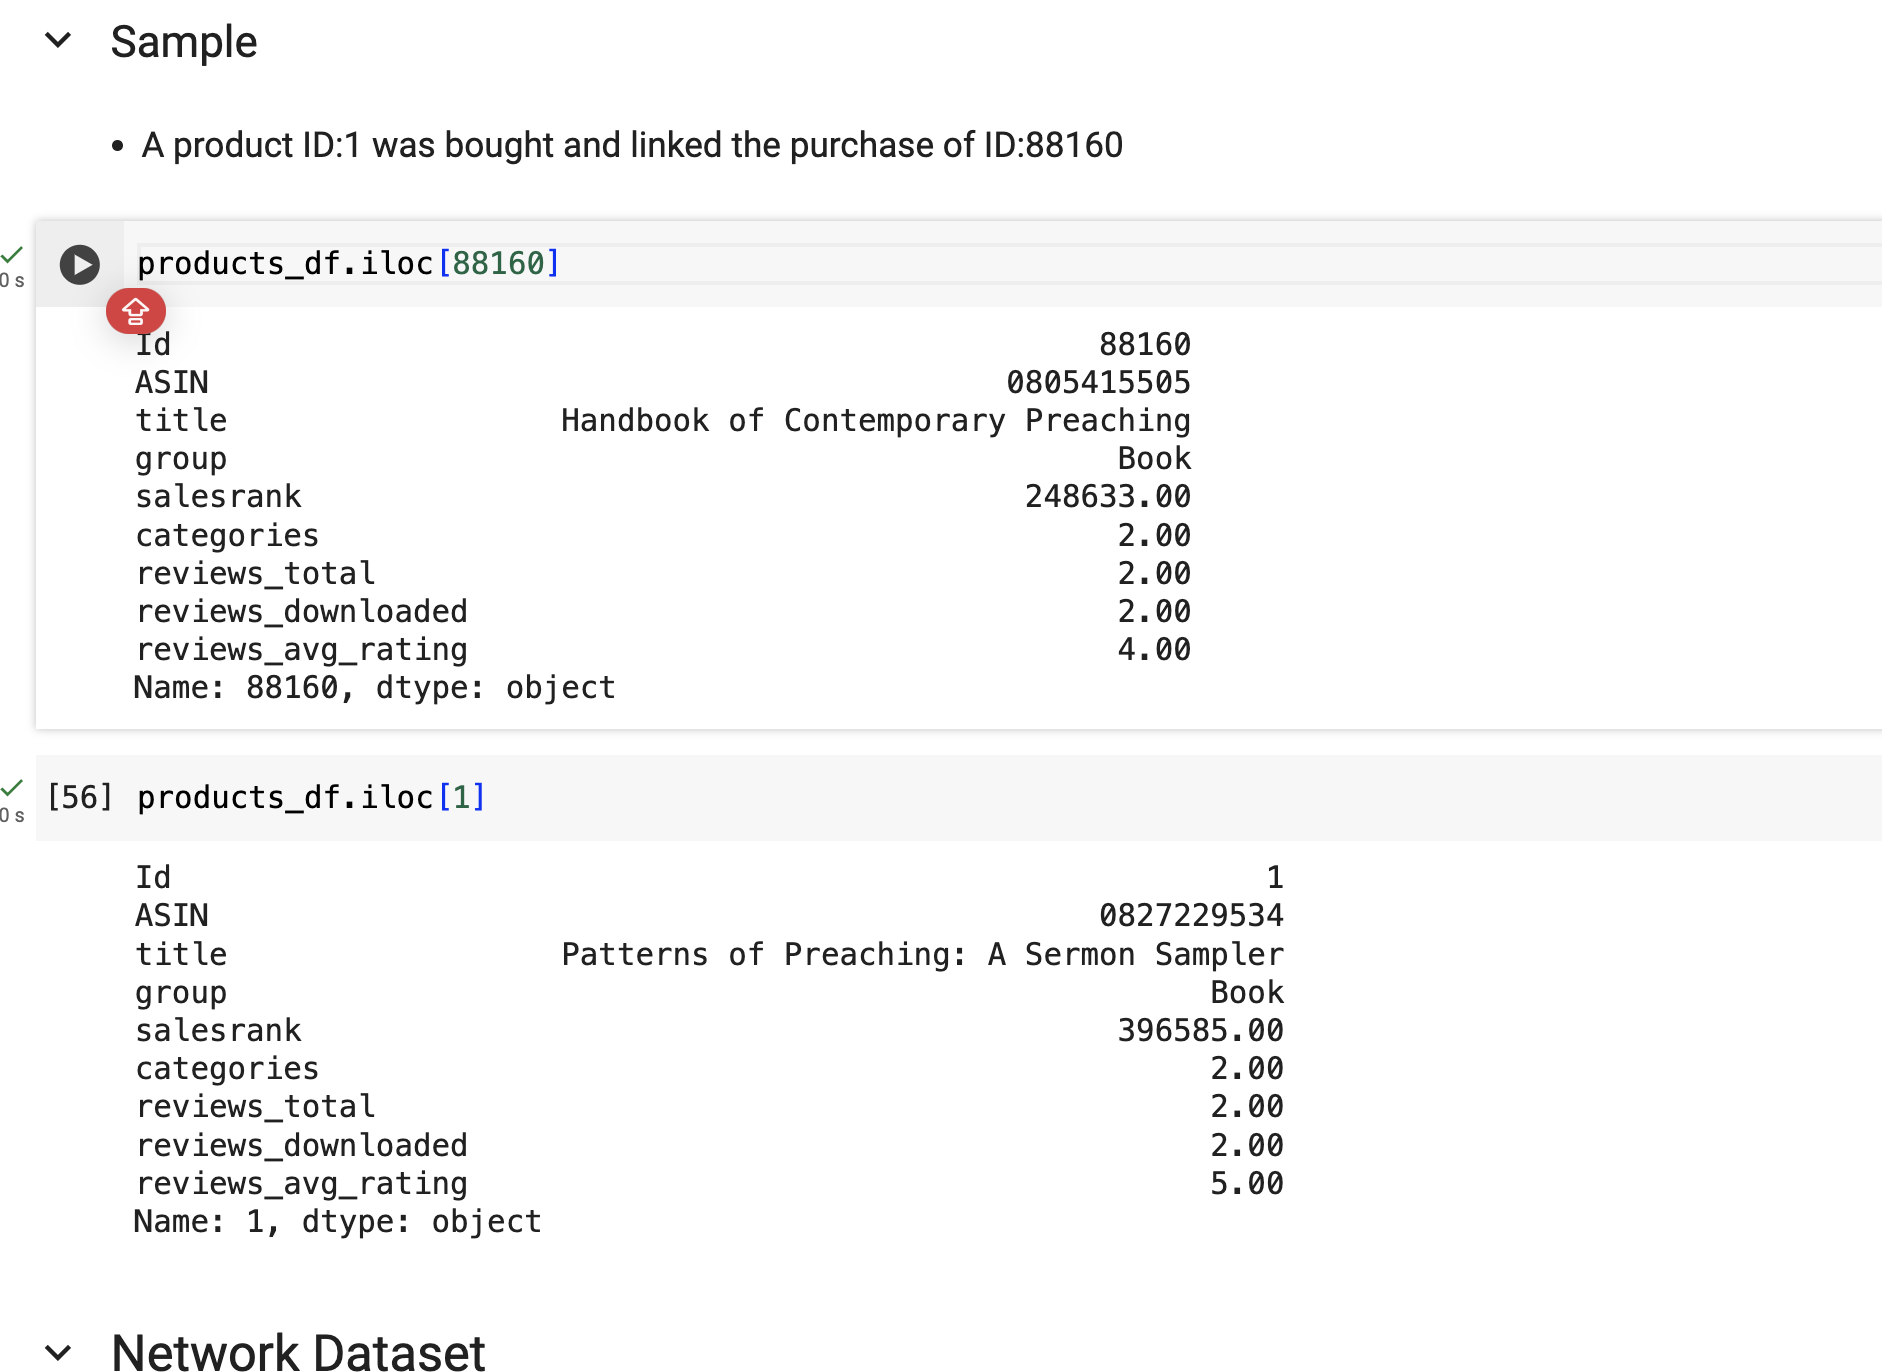

In [ ]:
products_df.iloc[88160]

Id                                                  88160
ASIN                                           0805415505
title                  Handbook of Contemporary Preaching
group                                                Book
salesrank                                       248633.00
categories                                           2.00
reviews_total                                        2.00
reviews_downloaded                                   2.00
reviews_avg_rating                                   4.00
Name: 88160, dtype: object

In [ ]:
products_df.iloc[1]

Id                                                           1
ASIN                                                0827229534
title                  Patterns of Preaching: A Sermon Sampler
group                                                     Book
salesrank                                            396585.00
categories                                                2.00
reviews_total                                             2.00
reviews_downloaded                                        2.00
reviews_avg_rating                                        5.00
Name: 1, dtype: object

## Network Dataset

In [ ]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.5 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from node2vec import Node2Vec
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Initialize an empty graph
# G = nx.DiGraph()
G = nx.Graph()

# Open and read the dataset
with open('/content/drive/MyDrive/2024-I/Network Science for Data Analytics/Network Science for Data Analytics/datasets/com-amazon.ungraph.txt', 'r') as file:
    for idx, line in enumerate(file):
        # Ignore lines starting with '#'
        if not line.startswith('#'):
            # Here, I assume each line represents an edge between two nodes separated by a space
            # You might need to adjust the split method according to your dataset's structure
            parts = line.strip().split()
            # Check if the line has enough information to form an edge (at least two nodes)
            if len(parts) >= 2:
                # Add an edge to the graph
                G.add_edge(parts[0], parts[1])

        if idx > 1000000:
          break

# Now G contains your network dataset
# You can perform various network analysis tasks with G


### Plot of Graph

Subset of Nodes:
['1', '88160', '118052', '161555', '244916', '346495', '444232', '447165', '500600', '2']
Associated Edges:
[('1', '88160'), ('1', '118052'), ('1', '161555'), ('1', '244916'), ('1', '346495'), ('1', '444232'), ('1', '447165'), ('1', '500600'), ('88160', '48724'), ('88160', '102091'), ('88160', '160086'), ('88160', '161555'), ('88160', '346495'), ('88160', '413439'), ('118052', '8487'), ('118052', '18733'), ('118052', '44400'), ('118052', '77015'), ('118052', '112833'), ('118052', '143523'), ('118052', '161555'), ('118052', '244916'), ('118052', '278797'), ('118052', '286641'), ('118052', '407256'), ('118052', '441749'), ('118052', '444232'), ('118052', '479787'), ('118052', '498948'), ('118052', '500600'), ('118052', '512593'), ('161555', '36179'), ('161555', '52569'), ('161555', '143523'), ('161555', '150819'), ('161555', '156082'), ('161555', '168806'), ('161555', '206115'), ('161555', '222934'), ('161555', '228193'), ('161555', '236769'), ('161555', '244916'), ('161

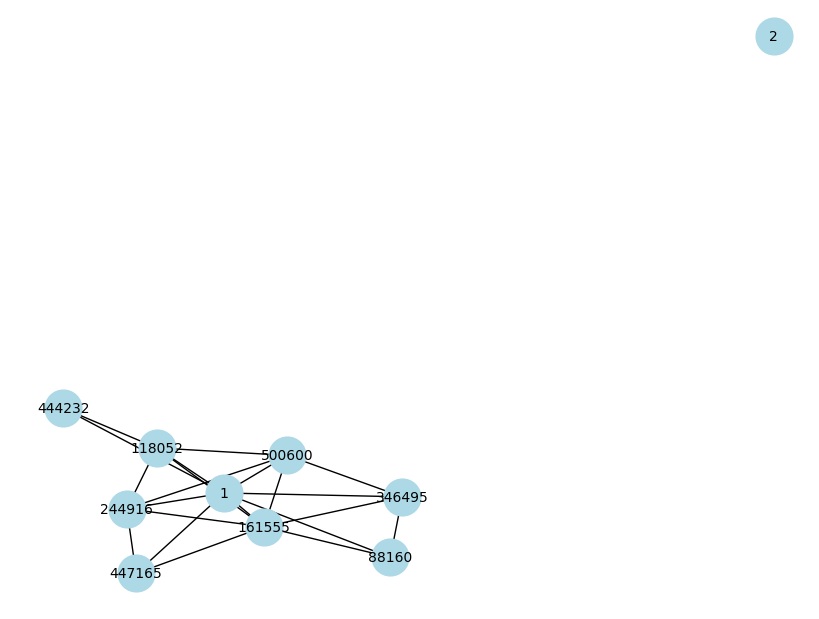

In [ ]:
# Define the number of nodes you want to display
num_nodes_to_display = 10

# Fetch a subset of nodes
subset_nodes = list(G.nodes())[:num_nodes_to_display]

# Fetch edges for the subset of nodes
subset_edges = [edge for edge in G.edges() if edge[0] in subset_nodes or edge[1] in subset_nodes]

# Print the subset of nodes and edges
print("Subset of Nodes:")
print(subset_nodes)
print("Associated Edges:")
print(subset_edges)

# Visualize the subset of the network
plt.figure(figsize=(8, 6))
subgraph = G.subgraph(subset_nodes)
nx.draw(subgraph, with_labels=True, node_size=700, node_color='lightblue', font_size=10)
plt.show()


In [ ]:
# Basic properties
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 334863
Number of edges: 925872


## Let's sample the graph, because almost 1 million edges is too computationaly expensive

In [ ]:
import random

In [ ]:
sample_size = G.number_of_nodes() * 0.1
sample_size = int(sample_size)
sample_size

33486

In [ ]:
# Sample a subset of nodes
sampled_nodes = random.sample(G.nodes(), sample_size) # take sample nodes

# Create a subgraph with the sampled nodes
sampled_G = G.subgraph(sampled_nodes)


<ipython-input-22-89ea5d6e9964>:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(G.nodes(), sample_size) # take sample nodes


In [ ]:
# Basic properties
print(f"Number of nodes: {sampled_G.number_of_nodes()}")
print(f"Number of edges: {sampled_G.number_of_edges()}")

Number of nodes: 33486
Number of edges: 9438


In [ ]:
# Assuming 'G_undirected' is your undirected graph
components = nx.connected_components(sampled_G)
largest_component = max(components, key=len)

# Create a subgraph of the largest component
LCC = sampled_G.subgraph(largest_component).copy()


## LLC
- Largest connected component

In [ ]:
# wwe have a connected graph, we can calculate CONNECTED metrics:
# diameter = nx.diameter(LCC)
# avg_shortest_path_length = nx.average_shortest_path_length(LCC)

# print(f"Diameter of the largest connected component: {diameter}")
# print(f"Average shortest path length of the largest connected component: {avg_shortest_path_length}")


In [ ]:
# Degree stats
degrees = [degree for node, degree in sampled_G.degree()]
avg_degree = np.mean(degrees)
print(f"Average degree: {avg_degree}")

Average degree: 0.5636982619602222


In [ ]:
# Network density
density = nx.density(sampled_G)
print(f"Density of the graph: {density}")

Density of the graph: 1.6834351559212248e-05


In [ ]:
degrees = [deg for deg in degrees if deg < 50]

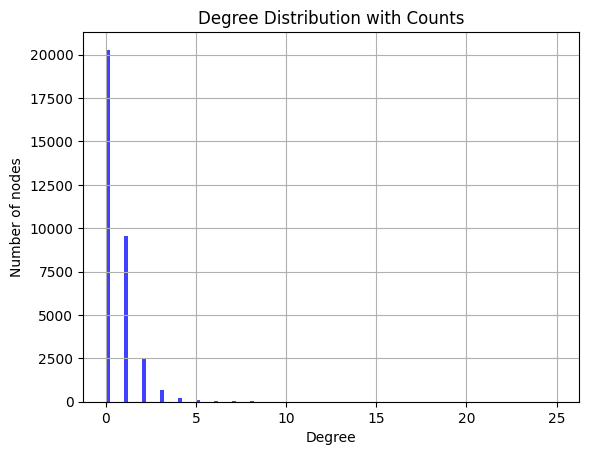

In [ ]:
# Degree distribution (for visualization)
import matplotlib.pyplot as plt

# Calculate histogram
bin_counts, bin_edges, patches = plt.hist(degrees, bins=100, color='blue', alpha=0.75)

plt.title("Degree Distribution with Counts")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.grid(True)


plt.show()

### More detailed hist

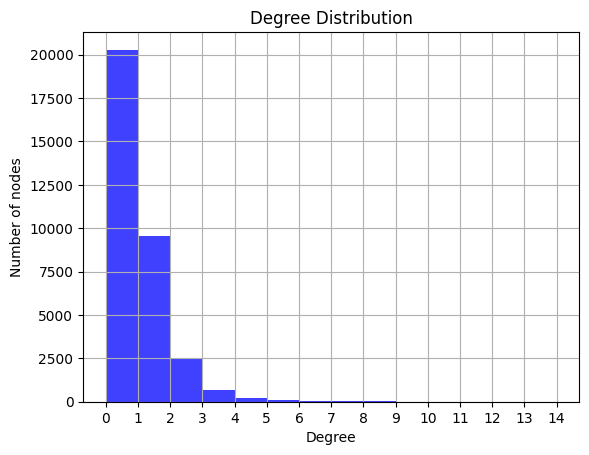

In [ ]:

# Plot histogram
plt.hist(degrees, bins=range(15), color='blue', alpha=0.75)

plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.grid(True)

# Set x-ticks to show every integer from 0 to 10
plt.xticks(np.arange(0, 15, 1))

# Show plot
plt.show()

## Network Science Approach
1. Embed
2. Apply some algorithm
3. Show prelimanry results

### Create a Node2Vec Model

This step represents the embedding step process. From being a node to be a vector.
- `dimensions: 64` Vector Dimension. 64 is balanced for a 300,000+ node-size graph
- `walk_length: 64` A longer walk length allows the algorithm to gather more information from farther parts of the graph
- `num_walks: 64` Increasing this number provides more comprehensive sampling of the graph's paths for the embedding
- `workers: 64` Threads to work paralelly

In [ ]:
# Create a Node2Vec Mpdel
node2vec = Node2Vec(sampled_G, dimensions=64, walk_length=20, num_walks=100, workers=4)

Computing transition probabilities:   0%|          | 0/33486 [00:00<?, ?it/s]

In [ ]:
# Create a Node2Vec Mpdel
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)

# Train model
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Get embeddings
embeddings = model.wv

# Example: Get the embedding for a product
product_id = 'B000F83SZQ'  # Replace with an actual product ID from your graph
product_embedding = embeddings[product_id]

# You can save the embeddings to use later
embeddings.save_word2vec_format('embeddings.txt')

# Use embeddings for machine learning tasks, e.g., clustering, similarity detectio